In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 

In [2]:
salary_data=pd.read_csv('C:/Users/user/Desktop/IVY WORK BOOK/PYTHON/Python Datasets/Classification Datasets/SalaryDataCleaned.csv')

In [135]:
salary_data.head(50)

,age,hours_per_week,workclass,education_num,occupation,sex,SalaryGT50K
0,39,40,1,13,1,1,0
1,50,13,2,13,2,1,0
2,38,40,3,9,3,1,0
3,53,40,3,7,3,1,0
4,28,40,3,13,4,0,0
5,37,40,3,14,2,0,0
6,49,16,3,5,5,0,0
7,52,45,2,9,2,1,1
8,31,50,3,14,4,0,1
9,42,40,3,13,2,1,1


In [136]:
pred_cols=['age','hours_per_week','workclass','education_num','occupation','sex','SalaryGT50K']
salary_data=salary_data[pred_cols]
salary_data.head()


,age,hours_per_week,workclass,education_num,occupation,sex,SalaryGT50K
0,39,40,1,13,1,1,0
1,50,13,2,13,2,1,0
2,38,40,3,9,3,1,0
3,53,40,3,7,3,1,0
4,28,40,3,13,4,0,0


In [5]:
salary_data_pickle=pd.to_pickle(salary_data,path='C:/Users/user/python ml/salary_data.pkl')

In [9]:
Modevalue=salary_data['workclass'].mode()[0]
Modevalue

' Private'

In [10]:
salary_data['workclass'].replace({' ?':Modevalue},inplace=True)

In [11]:
salary_data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [12]:
salary_data.head()

,age,hours_per_week,workclass,education_num,occupation,sex,SalaryGT50K
0,39,40,State-gov,13,Adm-clerical,Male,0
1,50,13,Self-emp-not-inc,13,Exec-managerial,Male,0
2,38,40,Private,9,Handlers-cleaners,Male,0
3,53,40,Private,7,Handlers-cleaners,Male,0
4,28,40,Private,13,Prof-specialty,Female,0


In [13]:
workclass_map={' State-gov':1,' Self-emp-not-inc':2,' Private':3,' Federal-gov':4,' Local-gov':5 ,' Self-emp-inc':6,
               ' Without-pay':7,' Never-worked':8}

salary_data['workclass']=salary_data['workclass'].map(workclass_map)

In [14]:
occupationmap={' Adm-clerical':1,' Exec-managerial':2,' Handlers-cleaners':3,' Prof-specialty':4,' Other-service':5,
                ' Sales':6,' Craft-repair':7,' Transport-moving':8,' Farming-fishing':9,' Machine-op-inspct':10,
                ' Tech-support':11, ' Protective-serv':12, ' Armed-Forces':13,' Priv-house-serv':14}

salary_data['occupation']=salary_data['occupation'].map(occupationmap)

In [15]:
salary_data.head(20)

,age,hours_per_week,workclass,education_num,occupation,sex,SalaryGT50K
0,39,40,1,13,1,Male,0
1,50,13,2,13,2,Male,0
2,38,40,3,9,3,Male,0
3,53,40,3,7,3,Male,0
4,28,40,3,13,4,Female,0
5,37,40,3,14,2,Female,0
6,49,16,3,5,5,Female,0
7,52,45,2,9,2,Male,1
8,31,50,3,14,4,Female,1
9,42,40,3,13,2,Male,1


In [16]:
salary_data['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [17]:
salary_data['sex'].replace({' Male':1,' Female':0}, inplace =True)

In [18]:
salary_data

,age,hours_per_week,workclass,education_num,occupation,sex,SalaryGT50K
0,39,40,1,13,1,1,0
1,50,13,2,13,2,1,0
2,38,40,3,9,3,1,0
3,53,40,3,7,3,1,0
4,28,40,3,13,4,0,0
...,...,...,...,...,...,...,...
32556,27,38,3,12,11,0,0
32557,40,40,3,9,10,1,1
32558,58,40,3,9,1,0,0
32559,22,20,3,9,1,1,0


In [19]:
salary_data.describe(include='all')

,age,hours_per_week,workclass,education_num,occupation,sex,SalaryGT50K
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581985,40.437456,3.105894,10.080679,5.188815,0.670434,0.240810
std,13.628422,12.347429,0.913031,2.572720,2.960858,0.470063,0.427581
min,17.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,28.000000,40.000000,3.000000,9.000000,3.000000,0.000000,0.000000
50%,37.000000,40.000000,3.000000,10.000000,5.000000,1.000000,0.000000
75%,48.000000,45.000000,3.000000,12.000000,7.000000,1.000000,0.000000
max,90.000000,99.000000,8.000000,16.000000,14.000000,1.000000,1.000000


In [20]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
age               32561 non-null int64
hours_per_week    32561 non-null int64
workclass         32561 non-null int64
education_num     32561 non-null int64
occupation        32561 non-null int64
sex               32561 non-null int64
SalaryGT50K       32561 non-null int64
dtypes: int64(7)
memory usage: 1.7 MB


In [ ]:
predictorvariable=['age','hours_per_week','workclass','education_num','occupation','sex']

In [194]:
## Logistic Regression

Targetvariable='SalaryGT50K'
predictorvariable=['age','hours_per_week','workclass','education_num','occupation','sex']
X=salary_data[predictorvariable].values
y=salary_data[Targetvariable].values
print(X.shape)
print(y.shape)

(32561, 6)
(32561,)


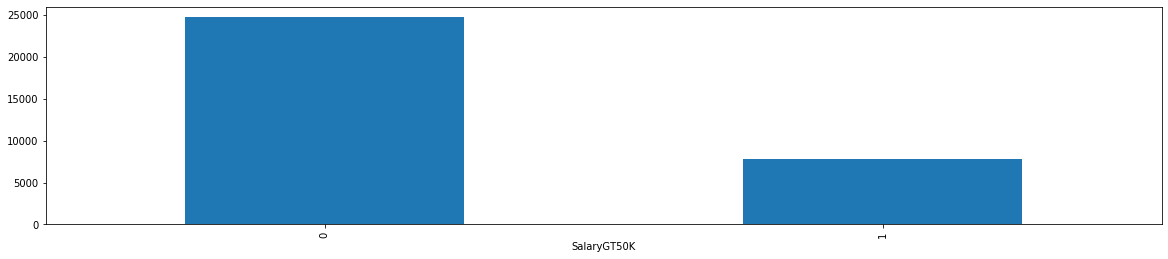

In [53]:
salary_data.groupby('SalaryGT50K').size().plot(kind='bar', figsize=(20,4))

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [187]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35 ,random_state=4200)
lgf=LogisticRegression(C=4,penalty='l1',solver='liblinear')
predctlogmodel=lgf.fit(X_train,y_train)
predictionlog=predctlogmodel.predict(X_test)
print("The classification is ",metrics.classification_report(y_test,predictionlog))
print("The confusion matrix is ",metrics.confusion_matrix(y_test,predictionlog))
print("the Accuracy of the model is ",metrics.classification_report(y_test,predictionlog).split()[-2])
Acc_score=metrics.classification_report(y_test,predictionlog).split()[-2]
print("The Accuracy score of iter",i,"is",Acc_score)
Accuracy_data=pd.DataFrame(columns=['Algorithm','iter','accuracy_score'])
Accuracy_data=Accuracy_data.append({'Algorithm':'logRegression','iter':i,'accuracy_score':Acc_score},ignore_index=True)
print('/'*70)

The classification  is                precision    recall  f1-score   support

           0       0.83      0.93      0.88      8630
           1       0.65      0.39      0.49      2767

    accuracy                           0.80     11397
   macro avg       0.74      0.66      0.68     11397
weighted avg       0.78      0.80      0.78     11397

The confusion matrix is  [[8039  591]
 [1691 1076]]
the Accuracy of the model is  0.78
The Accuracy score of iter 11 is 0.78
//////////////////////////////////////////////////////////////////////


In [183]:
 Accuracy_data.head(5)

,Algorithm,iter,accuracy_score
0,logRegression,11,0.78


(32561, 6)
(32561,)
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      6626
           1       0.63      0.41      0.49      2166

    accuracy                           0.80      8792
   macro avg       0.73      0.66      0.68      8792
weighted avg       0.78      0.80      0.78      8792

<function confusion_matrix at 0x00000177BE272438>
the Accuracy of the model is  0.78


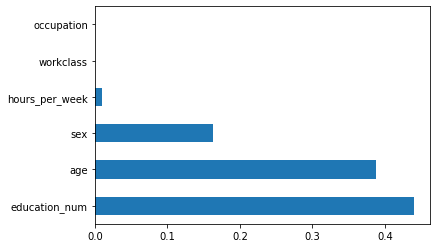

In [209]:
## Decision Tree
from sklearn import tree
Targetvariable='SalaryGT50K'
predictorvariable=['age','hours_per_week','workclass','education_num','occupation','sex']
X=salary_data[predictorvariable].values
y=salary_data[Targetvariable].values
print(X.shape)
print(y.shape)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.27 ,random_state=4200)
Dcf=tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')
predictmodel=Dcf.fit(X_train,y_train)
prediction=predictmodel.predict(X_test)
print(metrics.classification_report(y_test,prediction))
print(metrics.confusion_matrix)
print("the Accuracy of the model is ",metrics.classification_report(y_test,prediction).split()[-2])
Feature_importance=pd.Series(predictmodel.feature_importances_, index=predictorvariable)
Feature_importance.nlargest(10).plot(kind='barh')



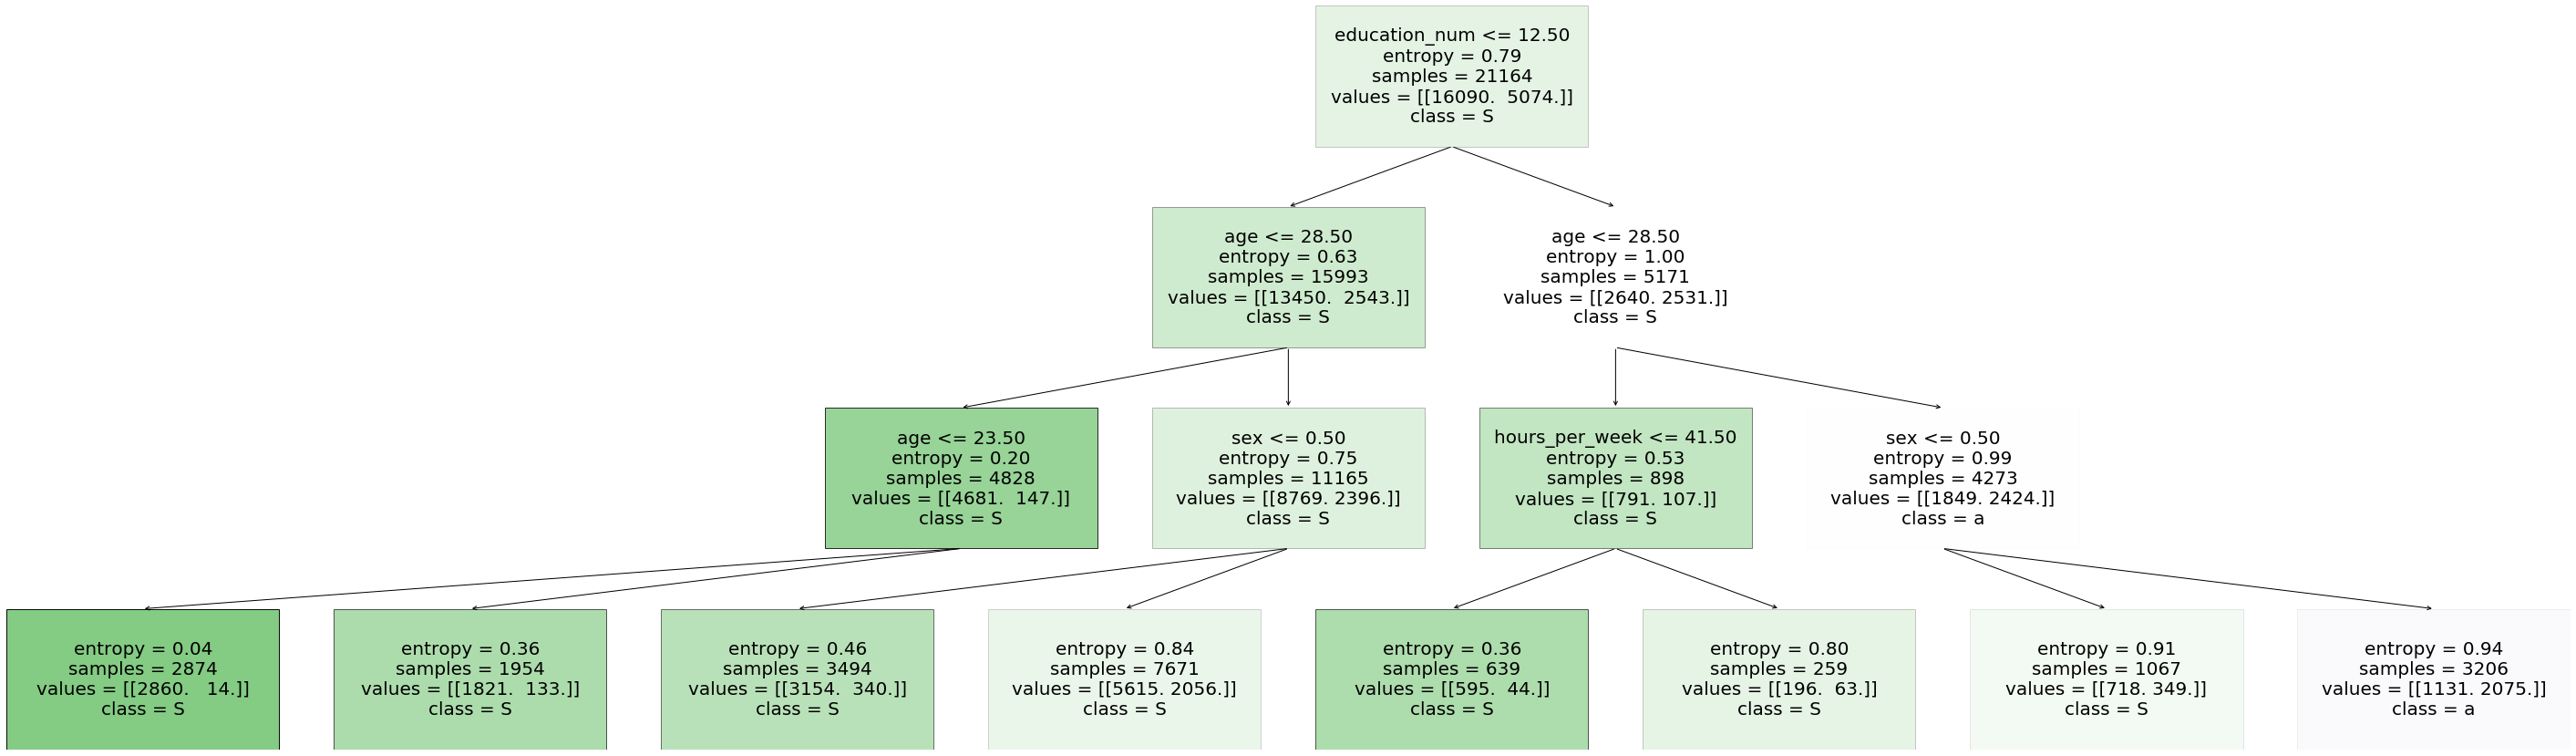

In [208]:
## ploting a decison tree
from dtreeplt import dtreeplt
Dtree=dtreeplt(model=Dcf,feature_names=predictorvariable,target_names=Targetvariable)
figure=Dtree.view()



(32561, 6)
(32561,)
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      8668
           1       0.70      0.38      0.49      2729

    accuracy                           0.81     11397
   macro avg       0.76      0.66      0.69     11397
weighted avg       0.80      0.81      0.79     11397

[[8225  443]
 [1700 1029]]
the Accuracy Score  0.79


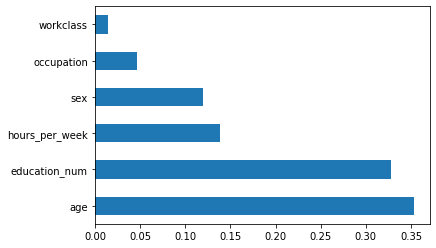

In [249]:
## random forest
from sklearn.ensemble import RandomForestClassifier
Targetvariable='SalaryGT50K'
predictorvariable=['age','hours_per_week','workclass','education_num','occupation','sex']
X=salary_data[predictorvariable].values
y=salary_data[Targetvariable].values
print(X.shape)
print(y.shape)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35 ,random_state=4)
Rlf=RandomForestClassifier(max_depth=5,n_estimators=200,criterion='entropy')
predictmodel=Rlf.fit(X_train,y_train)
predictions=predictmodel.predict(X_test)
print(metrics.classification_report(y_test,predictions))
print(metrics.confusion_matrix(y_test,predictions))
print("the Accuracy Score ",metrics.classification_report(y_test,predictions).split()[-2])
Feature_imporatnce=pd.Series(predictmodel.feature_importances_, index=predictorvariable)
Feature_imporatnce.nlargest(10).plot(kind='barh')


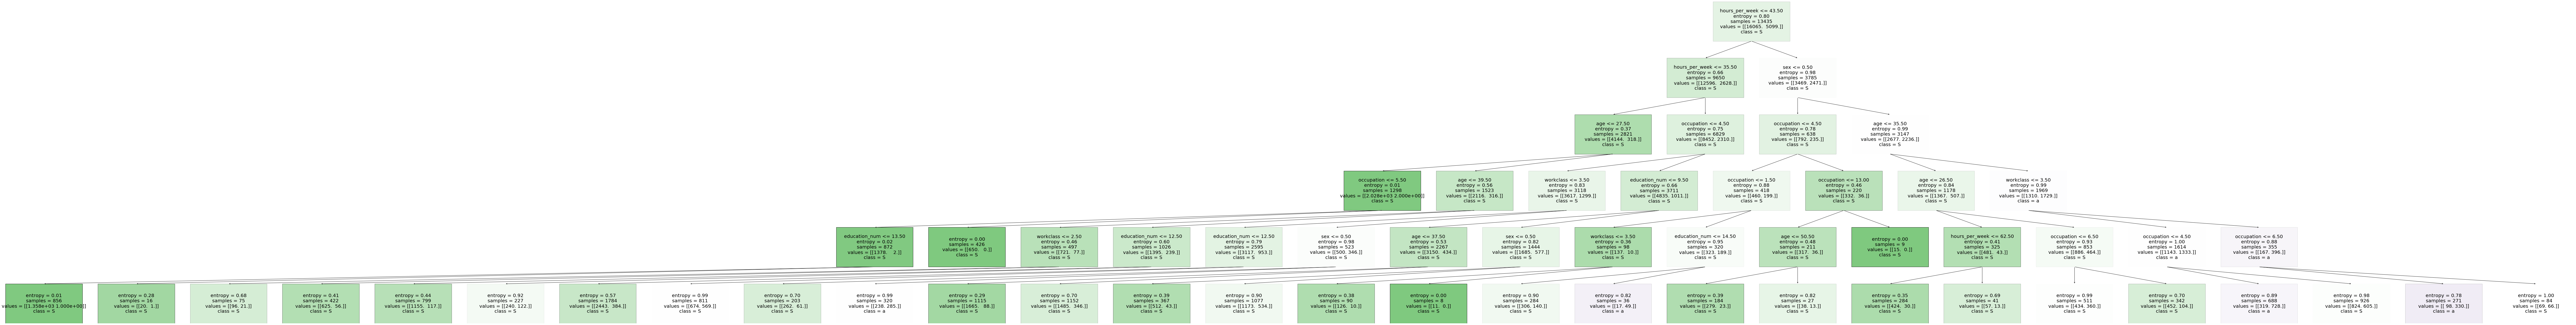

In [250]:
from dtreeplt import dtreeplt
Rtree=dtreeplt(model=Rlf.estimators_[2], feature_names=predictorvariable, target_names=Targetvariable)
fig=Rtree.view()

(32561, 6)
(32561,)
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      8724
           1       0.66      0.46      0.54      2673

    accuracy                           0.82     11397
   macro avg       0.76      0.70      0.72     11397
weighted avg       0.81      0.82      0.81     11397

[[8096  628]
 [1438 1235]]
Accuracy Score 0.81


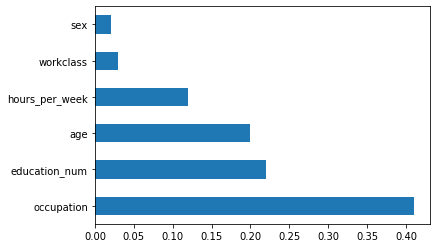

In [261]:
## Ada Boost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
Targetvariable='SalaryGT50K'
predictorvariable=['age','hours_per_week','workclass','education_num','occupation','sex']
X=salary_data[predictorvariable].values
y=salary_data[Targetvariable].values
print(X.shape)
print(y.shape)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35 ,random_state=65289)
dlf=DecisionTreeClassifier(max_depth=1)
Alf=AdaBoostClassifier(learning_rate=1.0,base_estimator=dlf,n_estimators=100)
predictmodel=Alf.fit(X_train,y_train)
predictions=predictmodel.predict(X_test)
print(metrics.classification_report(y_test,predictions))
print(metrics.confusion_matrix(y_test,predictions))
print("Accuracy Score",metrics.classification_report(y_test,predictions).split()[-2])
feaute_importance=pd.Series(predictmodel.feature_importances_ ,index=predictorvariable )
feaute_importance.nlargest(10).plot(kind='barh')

(32561, 6)
(32561,)
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      8724
           1       0.65      0.47      0.55      2673

    accuracy                           0.82     11397
   macro avg       0.75      0.70      0.72     11397
weighted avg       0.80      0.82      0.81     11397

[[8050  674]
 [1406 1267]]
Accuracy 0.81


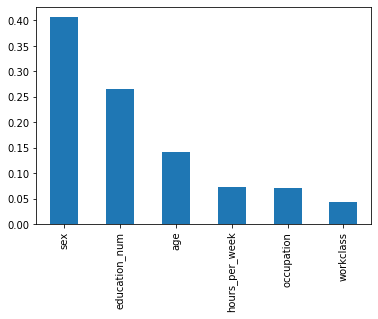

In [280]:
##xgboost
from xgboost import XGBClassifier
Targetvariable='SalaryGT50K'
predictorvariable=['age','hours_per_week','workclass','education_num','occupation','sex']
X=salary_data[predictorvariable].values
y=salary_data[Targetvariable].values
print(X.shape)
print(y.shape)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35 ,random_state=65289)
xlf=XGBClassifier(max_depth=3,learning_rate=0.5,n_estimators=150,objective='binary:logistic',booster='dart')
predictmodel=xlf.fit(X_train,y_train)
predictions=predictmodel.predict(X_test)
print(metrics.classification_report(y_test,predictions))
print(metrics.confusion_matrix(y_test,predictions))
print("Accuracy",metrics.classification_report(y_test,predictions).split()[-2])
feautre_importance=pd.Series(predictmodel.feature_importances_,index=predictorvariable)
feautre_importance.nlargest(11).plot(kind='bar')